<a href="https://colab.research.google.com/github/nkilaru213/ai-excercises/blob/main/prescriptions_visulaizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data for analysis
prescription_df=pd.read_csv('/content/drive/My Drive/Exercises/PRESCRIPTIONS.csv')

prescription_df.columns


print(f"Dataset: {prescription_df.shape[0]} rows, {prescription_df.shape[1]} columns")
print(prescription_df.info())
print("Missing Values:\n", prescription_df.isnull().sum())
print("Top Drugs:\n", prescription_df['drug'].value_counts().head(5))
print("Dose Summary:\n", prescription_df['dose_val_rx'].describe())
print("Route Distribution:\n", prescription_df['route'].value_counts())
if 'startdate' in prescription_df.columns and 'enddate' in prescription_df.columns:
    prescription_df['startdate'], prescription_df['enddate'] = pd.to_datetime(prescription_df['startdate']), pd.to_datetime(prescription_df['enddate'])
    prescription_df['duration'] = (prescription_df['enddate'] - prescription_df['startdate']).dt.days
    print("Duration Summary:\n", prescription_df['duration'].describe())



Dataset: 10398 rows, 19 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10398 entries, 0 to 10397
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id             10398 non-null  int64  
 1   subject_id         10398 non-null  int64  
 2   hadm_id            10398 non-null  int64  
 3   icustay_id         7046 non-null   float64
 4   startdate          10398 non-null  object 
 5   enddate            10397 non-null  object 
 6   drug_type          10398 non-null  object 
 7   drug               10398 non-null  object 
 8   drug_name_poe      5766 non-null   object 
 9   drug_name_generic  5772 non-null   object 
 10  formulary_drug_cd  10397 non-null  object 
 11  gsn                9122 non-null   float64
 12  ndc                10397 non-null  float64
 13  prod_strength      10398 non-null  object 
 14  dose_val_rx        10398 non-null  object 
 15  dose_unit_rx       10398 non-null  obj

In [4]:
def plot_drug_type_distribution(df):
    # Visualizing drug type distribution
    drug_type_counts = df["drug_type"].value_counts()
    plt.figure(figsize=(6, 4))
    drug_type_counts.plot(kind="bar", color=["blue", "green", "orange"])
    plt.title("Drug Type Distribution")
    plt.xlabel("Drug Type")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [5]:

def plot_prescription_duration(df):
    # Checking the distribution of prescription duration
    # Converting 'startdate' and 'enddate' columns to datetime objects
    df["startdate"] = pd.to_datetime(df["startdate"])
    df["enddate"] = pd.to_datetime(df["enddate"])
    df["duration"] = (df["enddate"] - df["startdate"]).dt.days
    plt.figure(figsize=(8, 5))
    df["duration"].plot(kind="hist", bins=10, color="lightblue", edgecolor="black")
    plt.title("Prescription Duration Distribution")
    plt.xlabel("Duration (days)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()



In [6]:
def plot_route_distribution(df):
    # Analyzing route of administration
    route_counts = df["route"].value_counts()
    plt.figure(figsize=(6, 4))
    route_counts.plot(kind="pie", autopct="%1.1f%%", colors=["gold", "lightgreen"])
    plt.title("Route of Administration Distribution")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

In [7]:
def plot_drug_usage_over_time(df):
    # Trend of drug usage over time
    prescriptions_by_date = df.groupby(df["startdate"].dt.to_period("M")).size()
    plt.figure(figsize=(10, 5))
    prescriptions_by_date.plot(kind="line", marker="o", color="coral")
    plt.title("Drug Usage Over Time")
    plt.xlabel("Month")
    plt.ylabel("Number of Prescriptions")
    plt.tight_layout()
    plt.show()

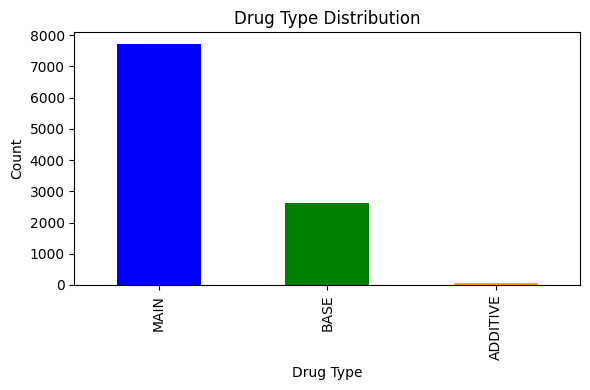

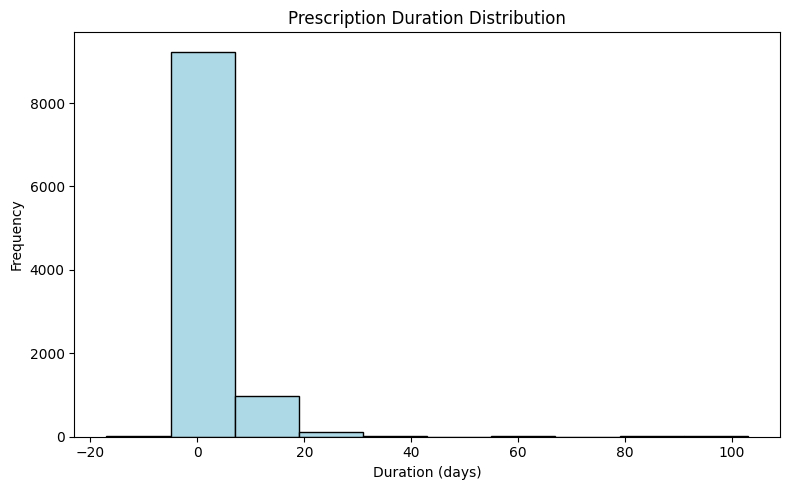

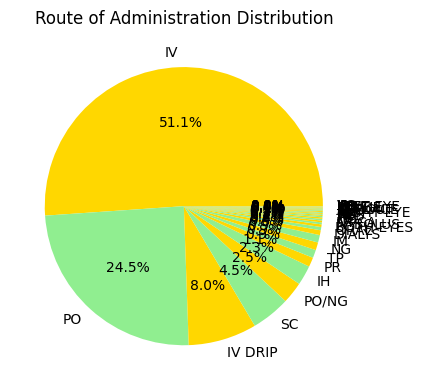

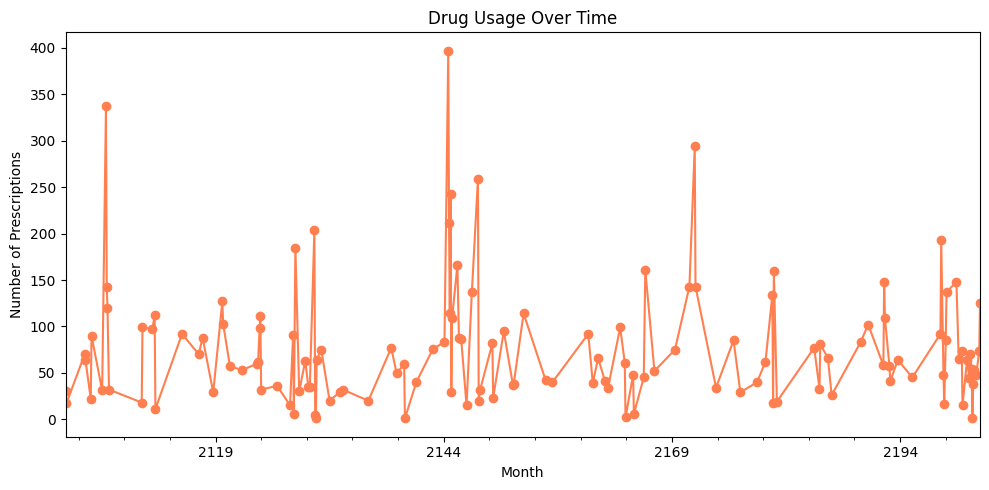

In [8]:
# Generating relevant visualizations
plot_drug_type_distribution(prescription_df)
plot_prescription_duration(prescription_df)
plot_route_distribution(prescription_df)
plot_drug_usage_over_time(prescription_df)

